In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('ifood_df.csv')

In [ ]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
df.shape

(2205, 39)

In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [ ]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
df = df.dropna()

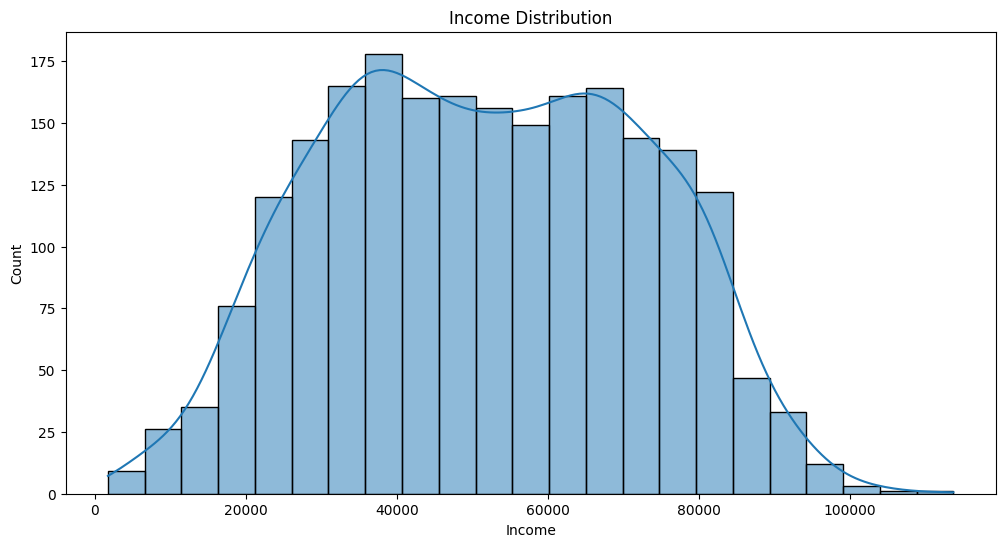

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

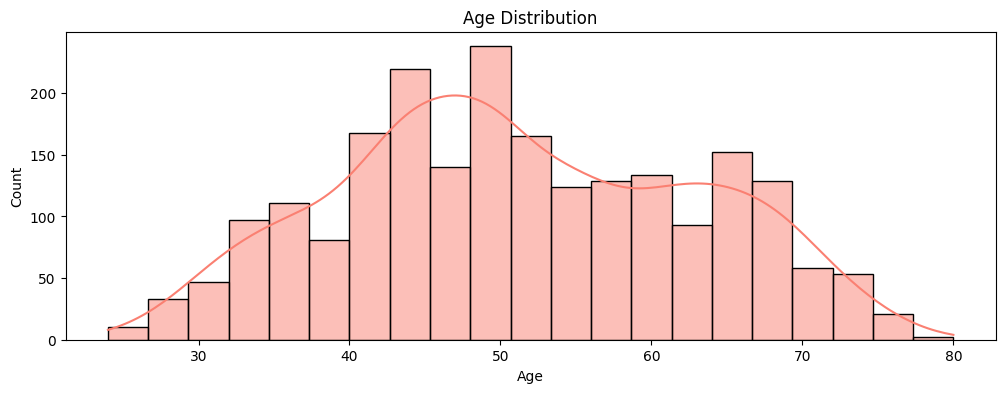

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['Age'], kde=True, color='salmon')
plt.title('Age Distribution')
plt.show()

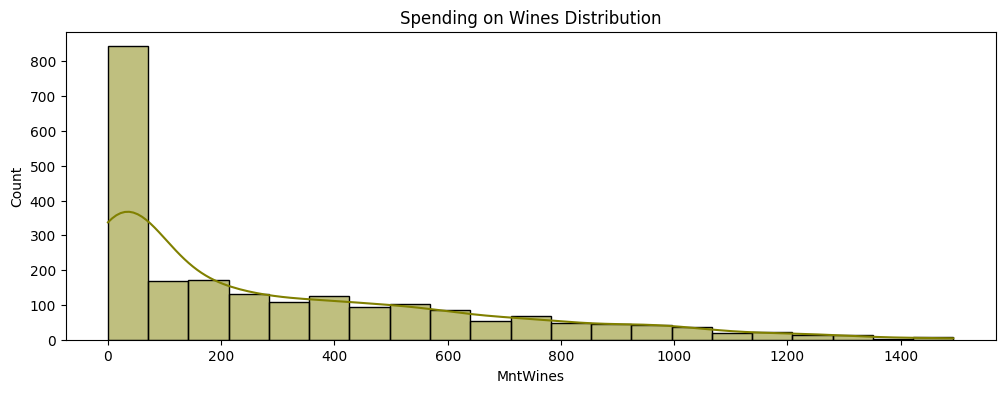

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['MntWines'], kde=True, color='olive')
plt.title('Spending on Wines Distribution')
plt.show()

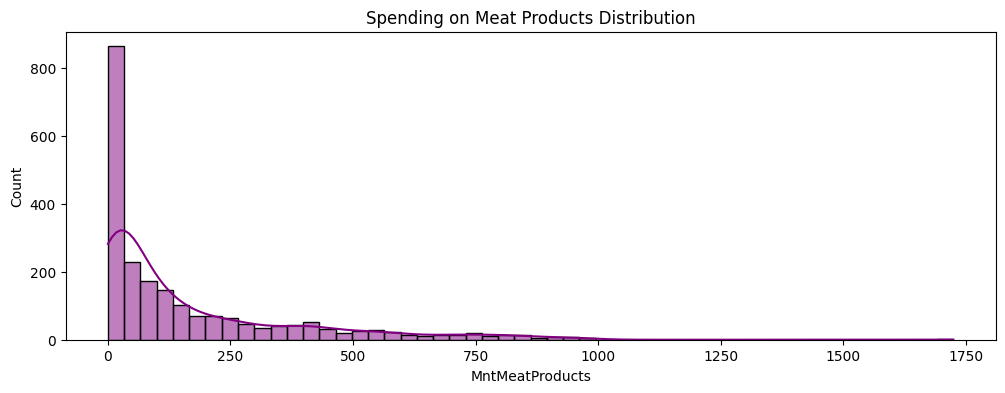

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['MntMeatProducts'], kde=True, color='purple')
plt.title('Spending on Meat Products Distribution')
plt.show()

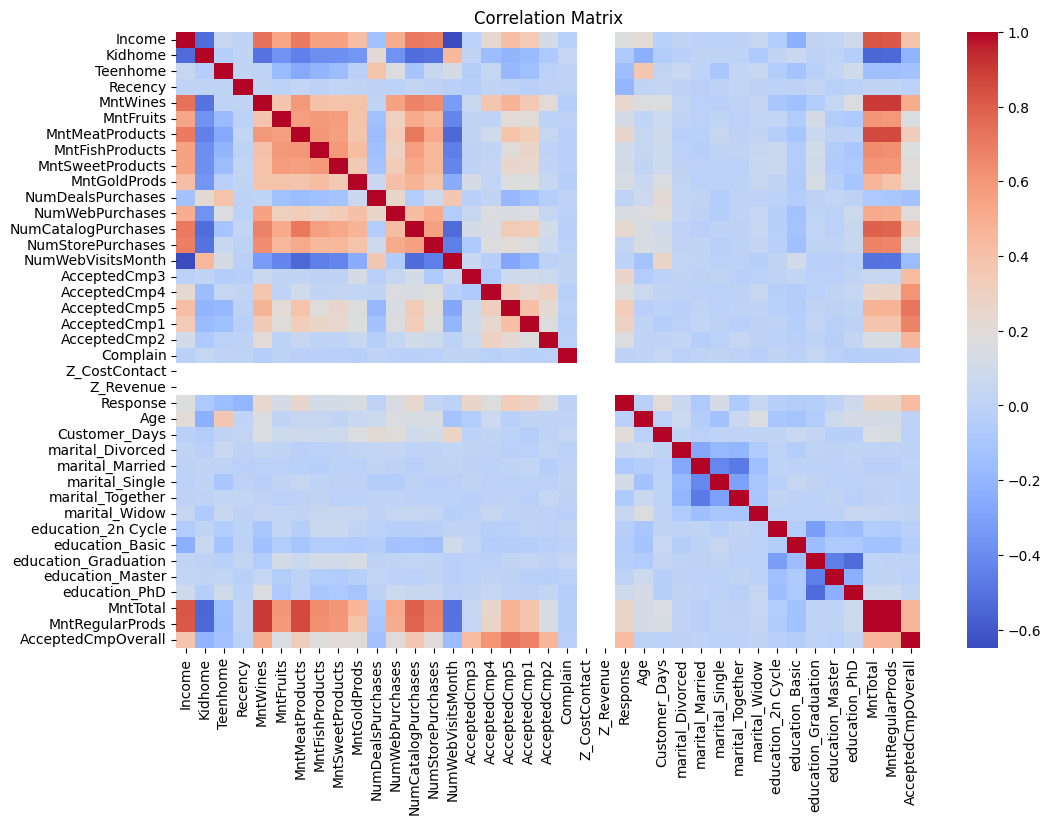

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
features = df[['Income', 'Kidhome', 'Teenhome', 'Recency',
               'MntWines', 'MntFruits', 'MntMeatProducts',
               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
               'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
               'NumStorePurchases', 'NumWebVisitsMonth']]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

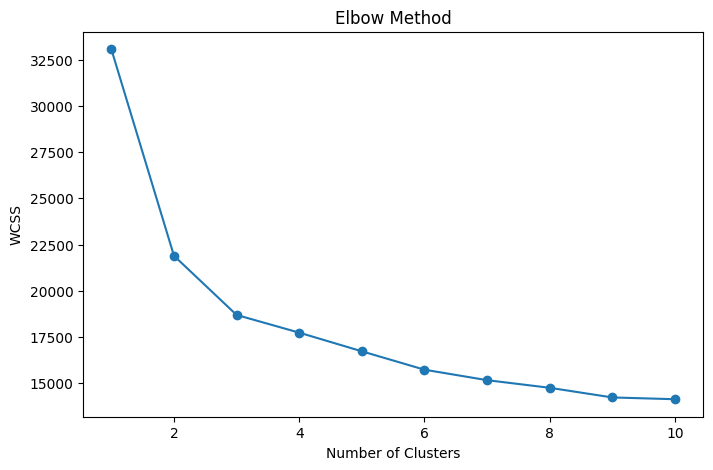

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

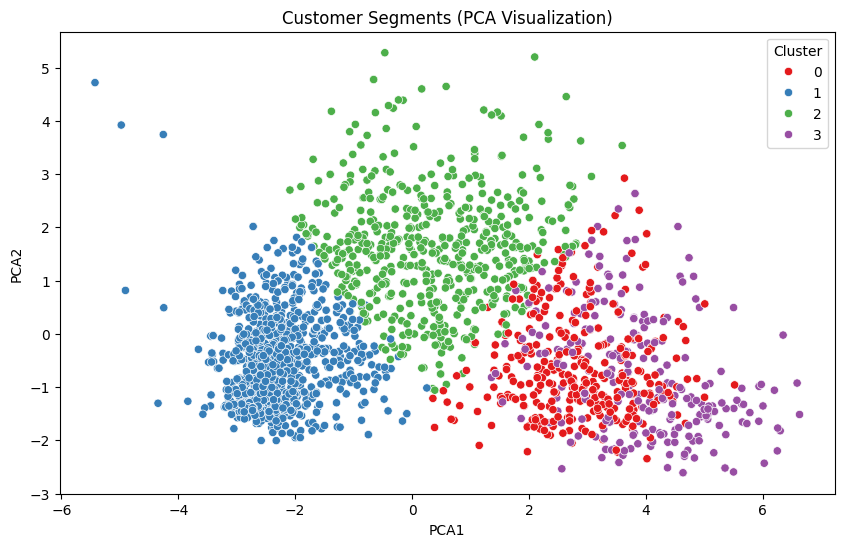

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=df)
plt.title('Customer Segments (PCA Visualization)')
plt.show()

In [ ]:
df.groupby('Cluster').mean()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,PCA1,PCA2
Cluster,,,,,,,,,,,,,,,,,,,,,
0,75313.608939,0.047486,0.145251,50.740223,671.226257,40.293296,439.932961,74.497207,42.701117,62.279330,...,0.072626,0.000000,0.477654,0.181564,0.268156,1268.650838,1206.371508,0.754190,2.857765,-0.622455
1,33741.033233,0.800604,0.432024,48.950655,38.673716,4.838872,22.075529,7.100705,4.895267,14.887210,...,0.108761,0.052367,0.490433,0.163142,0.185297,77.584089,62.696878,0.088620,-2.295613,-0.523610
2,57193.028814,0.259322,0.954237,48.527119,439.359322,19.798305,124.416949,26.247458,20.611864,58.798305,...,0.057627,0.001695,0.477966,0.186441,0.276271,630.433898,571.635593,0.272881,0.371540,1.611028
3,74301.946970,0.037879,0.276515,47.958333,519.579545,103.439394,423.068182,128.962121,104.200758,96.121212,...,0.113636,0.003788,0.655303,0.102273,0.125000,1279.250000,1183.128788,0.534091,3.928997,-0.786827


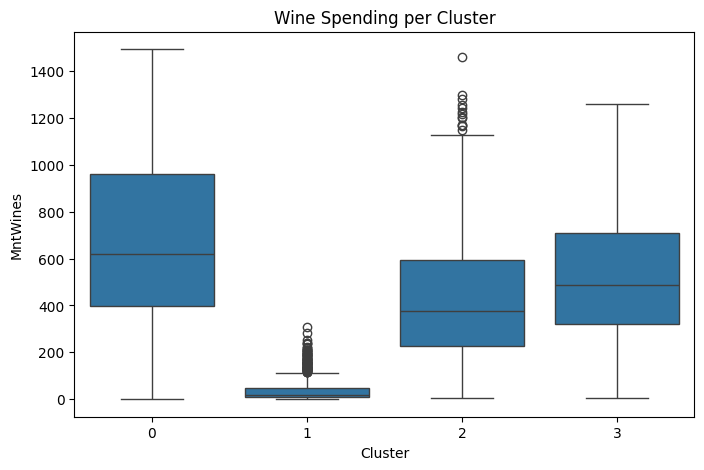

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='MntWines', data=df)
plt.title('Wine Spending per Cluster')
plt.show()

In [ ]:
# Manual markdown cell or print statements
for i in range(4):
    print(f"Cluster {i} insights:")
    segment = df[df['Cluster'] == i]
    print("Average Income:", segment['Income'].mean())
    print("Avg. Web Purchases:", segment['NumWebPurchases'].mean())
    print("Avg. Wine Spending:", segment['MntWines'].mean())
    print("="*40)

Cluster 0 insights:
Average Income: 75313.60893854749
Avg. Web Purchases: 5.005586592178771
Avg. Wine Spending: 671.2262569832402
Cluster 1 insights:
Average Income: 33741.0332326284
Avg. Web Purchases: 2.0704934541792546
Avg. Wine Spending: 38.67371601208459
Cluster 2 insights:
Average Income: 57193.02881355932
Avg. Web Purchases: 6.257627118644068
Avg. Wine Spending: 439.3593220338983
Cluster 3 insights:
Average Income: 74301.94696969698
Avg. Web Purchases: 5.6893939393939394
Avg. Wine Spending: 519.5795454545455
